# Домашнее задание № 2. Мешок слов

## Задание 1 (3 балла)

У векторайзеров в sklearn есть встроенная токенизация на регулярных выражениях. Найдите способо заменить её на кастомную токенизацию

Обучите векторайзер с дефолтной токенизацией и с токенизацией razdel.tokenize. Обучите классификатор с каждым из векторизаторов. Сравните метрики и выберете победителя. 

(в вашей тетрадке должен быть код обучения и все метрики; если вы сдаете в .py файлах то сохраните полученные метрики в отдельном файле или в комментариях)

In [34]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics.pairwise import cosine_distances, cosine_similarity

from IPython.display import Image
from IPython.core.display import HTML 

In [5]:
from razdel import tokenize

In [32]:
def raztok(txt):
    return [b.text for b in list(tokenize(txt))]


In [3]:
data = pd.read_csv('labeled.csv')

In [35]:
train, test = train_test_split(data, test_size=0.1, shuffle=True)

In [4]:
data

,comment,toxic
0,"Верблюдов-то за что? Дебилы, бл...\n",1.0
1,"Хохлы, это отдушина затюканого россиянина, мол...",1.0
2,Собаке - собачья смерть\n,1.0
3,"Страницу обнови, дебил. Это тоже не оскорблени...",1.0
4,"тебя не убедил 6-страничный пдф в том, что Скр...",1.0
...,...,...
14407,Вонючий совковый скот прибежал и ноет. А вот и...,1.0
14408,А кого любить? Гоблина тупорылого что-ли? Или ...,1.0
14409,"Посмотрел Утомленных солнцем 2. И оказалось, ч...",0.0
14410,КРЫМОТРЕД НАРУШАЕТ ПРАВИЛА РАЗДЕЛА Т.К В НЕМ Н...,1.0


In [60]:
vectorizer_st = TfidfVectorizer(min_df=10, max_df=0.4)
X_st = vectorizer_st.fit_transform(train.comment)
X_st_test = vectorizer_st.transform(test.comment)

In [61]:
vectorizer_razd = TfidfVectorizer(min_df=10, max_df=0.4, tokenizer=raztok)
X_razd = vectorizer_razd.fit_transform(train.comment)
X_razd_test = vectorizer_razd.transform(test.comment)

In [62]:
y = train.toxic.values

In [63]:
X_st.shape

(12970, 3390)

In [64]:
X_razd.shape

(12970, 3458)

In [65]:
clf_st = LogisticRegression(C=0.1, class_weight='balanced')
clf_razd = LogisticRegression(C=0.1, class_weight='balanced')

In [66]:
clf_razd.fit(X_razd,y)
clf_st.fit(X_st,y)

LogisticRegression(C=0.1, class_weight='balanced')

In [67]:
y_test = test.toxic.values

In [68]:
preds_st = clf_st.predict(X_st_test)
preds_razd = clf_razd.predict(X_razd_test)

In [69]:
print(classification_report(y_test, preds_st, zero_division=0))

              precision    recall  f1-score   support

         0.0       0.86      0.85      0.85       939
         1.0       0.72      0.75      0.74       503

    accuracy                           0.81      1442
   macro avg       0.79      0.80      0.80      1442
weighted avg       0.81      0.81      0.81      1442



In [70]:
print(classification_report(y_test, preds_razd, zero_division=0))

              precision    recall  f1-score   support

         0.0       0.88      0.83      0.85       939
         1.0       0.72      0.78      0.75       503

    accuracy                           0.81      1442
   macro avg       0.80      0.81      0.80      1442
weighted avg       0.82      0.81      0.82      1442



С небольшим отрывом побеждает токенизатор от Раздела. Ура!

## Задание 2 (3 балла)

Преобразуйте таблицу с абсолютными частотностями в семинарской тетрадке в таблицу с tfidf значениями. (Таблица - https://i.ibb.co/r5Nc2HC/abs-bow.jpg) Формула tfidf есть в семинаре на картнике с пояснениями на английском. 
Считать нужно в питоне. Формат итоговой таблицы может быть любым, главное, чтобы был код и можно было воспроизвести вычисления. 

In [ ]:
# ваш код

In [75]:
lines = ['я и ты', 
         'ты и я',
         'я я и только я', 
         'только не я', 'он']

In [91]:
bag_of = [g for g in [i.split() for i in lines]]

In [92]:
def flat(l):
    if isinstance(l, list):
        result = []
        for i in l:
            result = result + flat(i)
        return result
    else:
        return [l]

In [100]:
for i in set(flat(bag_of)):
    sents[i]=sents['sent'].apply(lambda x: x.count(i))

In [98]:
bag_of 

[['я', 'и', 'ты'],
 ['ты', 'и', 'я'],
 ['я', 'я', 'и', 'только', 'я'],
 ['только', 'не', 'я'],
 ['он']]

In [97]:
'coutii'.count('i')

2

In [95]:
sents = pd.DataFrame(lines, columns=['sent'])

In [111]:
sents.iloc[:,[1]]

,он
0,0
1,0
2,0
3,0
4,1


In [118]:
tfidf = sents.copy()

In [119]:
tfidf

,sent,он,только,и,я,не,ты
0,я и ты,0,0,1,1,0,1
1,ты и я,0,0,1,1,0,1
2,я я и только я,0,1,1,3,0,0
3,только не я,0,1,0,1,1,0
4,он,1,0,0,0,0,0


In [125]:
log(3)

1.0986122886681098

In [127]:
tfidf

,sent,он,только,и,я,не,ты
0,я и ты,0.000000,0.000000,0.536479,0.402359,0.000000,0.804719
1,ты и я,0.000000,0.000000,0.536479,0.402359,0.000000,0.804719
2,я я и только я,0.000000,0.804719,0.536479,1.207078,0.000000,0.000000
3,только не я,0.000000,0.804719,0.000000,0.402359,1.609438,0.000000
4,он,1.609438,0.000000,0.000000,0.000000,0.000000,0.000000


In [123]:
from math import log

In [126]:
for i in set(flat(bag_of)):
    tfidf[i]=tfidf[i].apply(lambda x: x*log(tfidf.shape[0])/tfidf[tfidf[i]!=0].shape[0]) 

In [112]:
Image(url="https://miro.medium.com/max/1200/1*V9ac4hLVyms79jl65Ym_Bw.jpeg",
     width=600, height=600)

## Задание 3 (2 балла)

Обучите 2 любых разных классификатора из семинара. Предскажите токсичность для текстов из тестовой выборки (используйте одну и ту же выборку для обоих классификаторов) и найдите 10 самых токсичных для каждого из классификаторов. Сравните получаемые тексты - какие тексты совпадают, какие отличаются, правда ли тексты токсичные?

Требования к классификаторам:   
а) один должен использовать CountVectorizer, другой TfidfVectorizer  
б) у векторазера должны быть вручную заданы как минимум 5 параметров  
в) у классификатора должно быть задано вручную как минимум 2 параметра  
г)  f1 мера каждого из классификаторов должна быть минимум 0.75  

In [ ]:
# ваш код

In [130]:
from nltk.corpus import stopwords

In [133]:
st = stopwords.words('russian')

In [128]:
train3, test3 = train_test_split(data, test_size=0.1, shuffle=True)

In [160]:
tfidv = TfidfVectorizer(min_df=3, max_df=0.4, analyzer=raztok, stop_words=st, ngram_range=(1,3))
countv = CountVectorizer(min_df=3, max_df=0.4, analyzer=raztok, stop_words=st, ngram_range=(1,3))

In [149]:
train3

,comment,toxic
10653,"Мдааа, оптимизаторы доигрались по всей видимос...",0.0
4811,Доказательства теории относительности можно в ...,0.0
7694,"близкая по духу история, жаль это всё лет 10 н...",0.0
14323,"Понятно, что пиздато, интересно, лучше, чем 99...",0.0
13528,"А кошелек в зимнем пуховике, который висит в ш...",0.0
...,...,...
10889,Очень красивый мужчина в расцвете сил! Желаю з...,0.0
160,"ты совсем дурачок, хохол? что такое по твоему ...",1.0
3014,Я частенько бывает вечерком напишу несколько п...,1.0
1914,"Даже левые, дроча на совок и Сталина, подставл...",1.0


In [161]:
X_tf= tfidv.fit_transform(train3.comment)
X_c = countv.fit_transform(train3.comment)
X_tf_test = tfidv.transform(test3.comment)
X_c_test = countv.transform(test3.comment)

In [162]:
y_t = train3.toxic

In [169]:
y_te = test3.toxic

In [204]:
clf_tf = LogisticRegression(fit_intercept=False,class_weight='balanced')
clf_c = MultinomialNB(alpha=0, fit_prior=None)

In [205]:
clf_tf.fit(X_tf, y_t)
clf_c.fit(X_c, y_t)

C:\Users\user\anaconda3\lib\site-packages\sklearn\naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


MultinomialNB(alpha=0, fit_prior=None)

In [206]:
preds_tf = clf_tf.predict(X_tf_test)
preds_c = clf_c.predict(X_c_test)

In [212]:
probas_tf = clf_tf.predict_proba(X_tf_test)
probas_c = clf_c.predict_proba(X_c_test)

In [219]:
tf_tox = [i[1] for i in probas_tf]
c_tox = [i[1] for i in probas_c]

In [220]:
test3['pr_tf']=tf_tox
test3['pr_c']=c_tox

<ipython-input-220-b7854b7a2396>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test3['pr_tf']=tf_tox
<ipython-input-220-b7854b7a2396>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test3['pr_c']=c_tox


In [207]:
print(classification_report(y_te, preds_tf, zero_division=0))

              precision    recall  f1-score   support

         0.0       0.88      0.89      0.89       958
         1.0       0.78      0.75      0.77       484

    accuracy                           0.85      1442
   macro avg       0.83      0.82      0.83      1442
weighted avg       0.84      0.85      0.85      1442



In [208]:
print(classification_report(y_te, preds_c, zero_division=0))

              precision    recall  f1-score   support

         0.0       0.88      0.87      0.88       958
         1.0       0.75      0.76      0.76       484

    accuracy                           0.84      1442
   macro avg       0.82      0.82      0.82      1442
weighted avg       0.84      0.84      0.84      1442



In [228]:
test3.sort_values(by='pr_tf', ascending=False).head(10)

,comment,toxic,pr_tf,pr_c
6554,"По мексикански Флаг: Ублюдок, мать твою, а ну ...",1.0,0.993544,1.000000
5577,АХАХАХАХАХАХАХ Ты в очередной раз доказываешь ...,1.0,0.990198,1.000000
2258,За то что ты дерейлаешь такой выгодный для вас...,1.0,0.989964,0.999996
2853,"Та иди нахуй, очеидно что ты твердолобый жЫрня...",1.0,0.988787,0.999806
2486,Класс. Кинуть хохлов.\n,1.0,0.987737,0.995576
129,"Да не торопись ты так, бабуль\n",0.0,0.986065,0.923374
71,"Какие же хохлы хайзенберги, пиздец просто.\n",1.0,0.984563,0.999957
2466,"Что ты там пукнула, дешевка?\n",1.0,0.981831,0.973795
2886,Зачем Пидорошенко взрывает хохлов?\n,1.0,0.981677,0.998880
2011,"Нахуй иди, я тебе весь тред что ли читать буду...",1.0,0.981314,0.999999


In [229]:
test3.sort_values(by='pr_c', ascending=False).head(10)

,comment,toxic,pr_tf,pr_c
419,И хули?Эмотивист ты ссаный?Маргинал тоже говор...,1.0,0.938556,1.0
13892,"Хохлы крайне примитивны, если тонко их троллит...",1.0,0.625977,1.0
6263,Я русский и мне бомбит от шария. Потому что он...,1.0,0.724069,1.0
14205,КАКИЕ ХОХЛЫ?! два урода. при чём ту вообще ХОХ...,1.0,0.861860,1.0
6116,узкоглазые муслимы-якуты пиздят узкоглазых мус...,1.0,0.665840,1.0
829,"Все согласны, блядь. Всем по полному ебучему з...",0.0,0.937112,1.0
13699,"что то не сходится. Пидорашко - хохлофамилия, ...",1.0,0.890242,1.0
6025,черт опущенный Гомикадзе Би опущенный гей на е...,1.0,0.710016,1.0
2353,"Лольнул ебаная кончита, когда ты сдохнешь уже?\n",1.0,0.949972,1.0
13748,ХУЯ ВЫ ТУТ БОМБИТЕ1А НЕХУЙ БЫЛО МАЛОГО ДИВАНОН...,1.0,0.507466,1.0


Результаты совсем разные, у каждого классификатора по одной "ошибке", хотя тут я не совсем согласна с изначальным аннотатором, потому что, например, №829 довольно токсичен сам по себе...
Интересное наблюдение: топовым значениям первого классификатора (регрессия+tfidf) соответствуют довольно высокие значения второго (каунтер+байес) - выше 0.9, тогда как топовые для второго сопровождаются большим разбросом у первого (от 0.5 до 0.95).

## *Задание 4 (2 балла)

Для классификаторов LogisticRegression, Decision Trees, Naive Bayes, Random Forest найдите способ извлечь важность признаков для предсказания токсичного класса. Сопоставьте полученные числа со словами (или нграммами) в словаре и найдите топ - 5 "токсичных" слов для каждого из классификаторов. 

Важное требование: в топе не должно быть стоп-слов. Для этого вам нужно будет правильным образом настроить векторизацию.

In [6]:
# ваш код

In [230]:
data

,comment,toxic
0,"Верблюдов-то за что? Дебилы, бл...\n",1.0
1,"Хохлы, это отдушина затюканого россиянина, мол...",1.0
2,Собаке - собачья смерть\n,1.0
3,"Страницу обнови, дебил. Это тоже не оскорблени...",1.0
4,"тебя не убедил 6-страничный пдф в том, что Скр...",1.0
...,...,...
14407,Вонючий совковый скот прибежал и ноет. А вот и...,1.0
14408,А кого любить? Гоблина тупорылого что-ли? Или ...,1.0
14409,"Посмотрел Утомленных солнцем 2. И оказалось, ч...",0.0
14410,КРЫМОТРЕД НАРУШАЕТ ПРАВИЛА РАЗДЕЛА Т.К В НЕМ Н...,1.0


In [242]:
vector = TfidfVectorizer(min_df=3, max_df=0.4, analyzer=raztok, stop_words=st, ngram_range=(1,3))

In [243]:
X = vector.fit_transform(data.comment)

In [251]:
names = vector.get_feature_names()

In [259]:
from yellowbrick.model_selection import FeatureImportances

In [248]:
y = data.toxic

In [278]:
regr = LogisticRegression(multi_class="auto", solver="liblinear")
bay = MultinomialNB()
dec = DecisionTreeClassifier()
rand = RandomForestClassifier()

In [279]:
for i in regr, bay, dec, rand:
    i.fit(X, y)

In [286]:

importances = pd.DataFrame(data={
    'Attribute': names,
    'Importance': regr.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

In [287]:
importances

,Attribute,Importance
14371,ты,100.000000
15160,хохлы,63.884917
15157,хохлов,62.754989
13974,тебя,53.326291
1957,Ты,49.214045
...,...,...
1296,Но,-38.431280
9316,очень,-38.887446
10,),-40.116905
8280,но,-40.667586


In [276]:
viz = FeatureImportances(rand, labels=names, stack=True, topn=5)
viz.fit(X, y)
viz.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


YellowbrickValueError: please specify the same number of colors as labels!

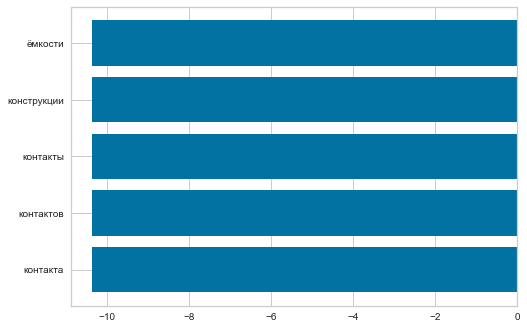

In [282]:
viz = FeatureImportances(bay, labels=names, stack=True,topn=5)
viz.fit(X, y)
viz.show()

YellowbrickValueError: please specify the same number of colors as labels!

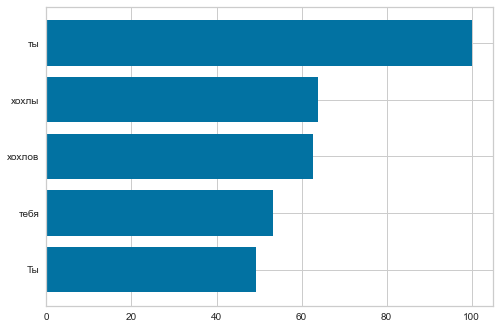

In [284]:
viz = FeatureImportances(regr, labels=names, relative=False, topn=5, stack=True)
viz.fit(X, y)
viz.show()

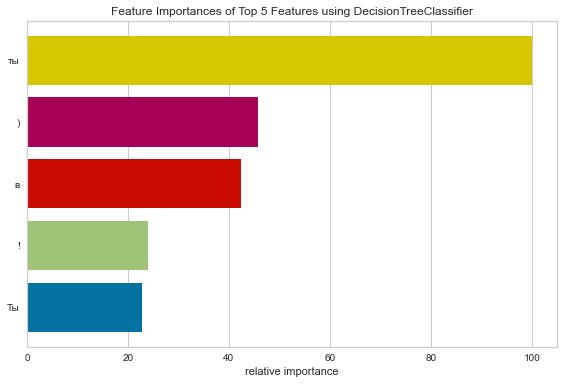

<AxesSubplot:title={'center':'Feature Importances of Top 5 Features using DecisionTreeClassifier'}, xlabel='relative importance'>

In [275]:
viz = FeatureImportances(dec, labels=names,  topn=5)
viz.fit(X, y)
viz.show()